In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt_kwargs = {'figsize': (10, 4)}

In [713]:
eco_rounds = pd.read_csv("../../data/vct_2022/matches/eco_rounds.csv")
#maps_scores = pd.read_csv("../../data/vct_2022/matches/maps_scores.csv")
#eco_stats = pd.read_csv("../../data/vct_2022/matches/eco_stats.csv")

In [714]:
eco_rounds = eco_rounds.loc[ (eco_rounds["Map"]=="Haven")]
eco_rounds["Outcome"] = eco_rounds["Outcome"].apply(lambda x: 1 if x == "Win" else 0)
eco_rounds["Loadout Value"] = eco_rounds["Loadout Value"].apply(lambda x: int(x.replace(".","").replace("k","00")))
eco_rounds["Remaining Credits"] = eco_rounds["Remaining Credits"].apply(lambda x: int(x.replace(".","").replace("k","00")))

eco_rounds

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
260,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,1,ZETA DIVISION,3700,200,Eco: 0-5k,1
261,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,1,LOUD,3700,300,Eco: 0-5k,0
262,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,2,ZETA DIVISION,16200,1400,Semi-buy: 10-20k,1
263,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,2,LOUD,4100,7500,Eco: 0-5k,0
264,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,3,ZETA DIVISION,13600,13700,Semi-buy: 10-20k,0
...,...,...,...,...,...,...,...,...,...,...,...
358393,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,18,FunPlus Phoenix,22500,12000,Full buy: 20k+,1
358394,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,19,5MOKES,19000,1500,Semi-buy: 10-20k,1
358395,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,19,FunPlus Phoenix,22100,20800,Full buy: 20k+,0
358396,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,20,5MOKES,19500,3400,Semi-buy: 10-20k,0


In [715]:
maps_scores = pd.read_csv("../../data/vct_2022/matches/maps_scores.csv")
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07


In [716]:
team_ab_2022 = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team B"]]

team_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,EDward Gaming
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,EDward Gaming
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,EDward Gaming
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,Team Liquid
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,Team Liquid
...,...,...,...,...,...,...,...
8879,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Bind,Natus Vincere,FunPlus Phoenix
8880,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Icebox,Natus Vincere,FunPlus Phoenix
8881,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Breeze,Natus Vincere,FunPlus Phoenix
8882,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,Natus Vincere,FunPlus Phoenix


In [717]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team']

Eco_rounds_ab_2022=\
pd.merge(
    team_ab_2022.rename(columns={"Team A":"Team"})\
    ,eco_rounds\
    ,on=keys
)\
.rename(columns={"Loadout Value":"Loadout_A", "Remaining Credits":"Remaining_credit_A", "Type":"Eco_type_A", "Outcome":"Outcome_A"})\
.rename(columns={"Team":"Team A", "Team B":"Team"})\
.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
.join(eco_rounds\
      .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
)\
.reset_index()\
.rename(columns={"Loadout Value":"Loadout_B", "Remaining Credits":"Remaining_credit_B", "Type":"Eco_type_B", "Outcome":"Outcome_B"})\
.rename(columns={"Team":"Team B"})

Eco_rounds_ab_2022.head()

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,1,ZETA DIVISION,3700,200,Eco: 0-5k,1,3700,300,Eco: 0-5k,0
1,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,2,ZETA DIVISION,16200,1400,Semi-buy: 10-20k,1,4100,7500,Eco: 0-5k,0
2,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,3,ZETA DIVISION,13600,13700,Semi-buy: 10-20k,0,20300,900,Full buy: 20k+,1
3,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,4,ZETA DIVISION,24200,1400,Full buy: 20k+,1,20800,3900,Full buy: 20k+,0
4,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,5,ZETA DIVISION,23200,6700,Full buy: 20k+,1,6500,8000,Semi-eco: 5-10k,0


In [718]:
Eco_rounds_ab_2022[[ "Eco_type_A", "Eco_type_B", "Outcome_A", "Round Number"]].groupby([ "Eco_type_A", "Eco_type_B", "Outcome_A"]).count()

Round Number
Eco_type_A       Eco_type_B       Outcome_A              
Eco: 0-5k        Eco: 0-5k        0                   558
                                  1                   671
                 Full buy: 20k+   0                    39
                                  1                     6
                 Semi-buy: 10-20k 0                   453
                                  1                    41
Full buy: 20k+   Eco: 0-5k        0                     6
                                  1                    42
                 Full buy: 20k+   0                  2118
                                  1                  2396
                 Semi-buy: 10-20k 0                   599
                                  1                  1135
                 Semi-eco: 5-10k  0                   185
                                  1                   681
Semi-buy: 10-20k Eco: 0-5k        0                    38
                                  1                   540
                 Full buy: 20k+   0                   942
                                  1                   607
                 Semi-buy: 10-20k 0                   196
                                  1                   227
                 Semi-eco: 5-10k  0                    21
                                  1                    73
Semi-eco: 5-10k  Full buy: 20k+   0                   534
                                  1                   151
                 Semi-buy: 10-20k 0                    54
                                  1                    22

In [719]:
def RoundRating(LoadOutA, LoadoutB,  OutcomeA):
    LoadoutB = max(LoadoutB, 100)
    LoadOutA = max(LoadOutA, 100)
    if OutcomeA == 1:
        return LoadoutB/LoadOutA
    if OutcomeA == 0:
        return 0
    
def RoundRating2(x, y):
    return 5

In [720]:
Eco_rounds_ab_2022["Rating_A"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_A"]]\
    .apply(lambda row: RoundRating(row["Loadout_A"], row["Loadout_B"], row["Outcome_A"]), axis=1)

Eco_rounds_ab_2022["Rating_B"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_B"]]\
    .apply(lambda row: RoundRating(row["Loadout_B"], row["Loadout_A"], row["Outcome_B"]), axis=1)


Eco_rounds_ab_2022.head(10)

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,1,ZETA DIVISION,3700,200,Eco: 0-5k,1,3700,300,Eco: 0-5k,0,1.000000,0.000000
1,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,2,ZETA DIVISION,16200,1400,Semi-buy: 10-20k,1,4100,7500,Eco: 0-5k,0,0.253086,0.000000
2,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,3,ZETA DIVISION,13600,13700,Semi-buy: 10-20k,0,20300,900,Full buy: 20k+,1,0.000000,0.669951
3,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,4,ZETA DIVISION,24200,1400,Full buy: 20k+,1,20800,3900,Full buy: 20k+,0,0.859504,0.000000
4,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,5,ZETA DIVISION,23200,6700,Full buy: 20k+,1,6500,8000,Semi-eco: 5-10k,0,0.280172,0.000000
5,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,6,ZETA DIVISION,27100,13200,Full buy: 20k+,0,21000,1000,Full buy: 20k+,1,0.000000,1.290476
6,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,7,ZETA DIVISION,20000,5100,Full buy: 20k+,1,20800,6400,Full buy: 20k+,0,1.040000,0.000000
7,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,8,ZETA DIVISION,25300,8900,Full buy: 20k+,1,19400,1800,Semi-buy: 10-20k,0,0.766798,0.000000
8,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,9,ZETA DIVISION,24300,13100,Full buy: 20k+,1,8800,8100,Semi-eco: 5-10k,0,0.362140,0.000000
9,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,10,ZETA DIVISION,25500,11100,Full buy: 20k+,0,23600,3100,Full buy: 20k+,1,0.000000,1.080508


In [721]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B']
grouped5 = Eco_rounds_ab_2022.groupby(keys)
Eco_rounds_ab_2022["Match Rating A"]=grouped5["Rating_A"].transform(lambda x: x.mean())
Eco_rounds_ab_2022["Match Rating B"]=grouped5["Rating_B"].transform(lambda x: x.mean())

Eco_rounds_ab_2022.head(5)

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,1,ZETA DIVISION,3700,200,Eco: 0-5k,1,3700,300,Eco: 0-5k,0,1.000000,0.000000,0.342734,0.515243
1,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,2,ZETA DIVISION,16200,1400,Semi-buy: 10-20k,1,4100,7500,Eco: 0-5k,0,0.253086,0.000000,0.342734,0.515243
2,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,3,ZETA DIVISION,13600,13700,Semi-buy: 10-20k,0,20300,900,Full buy: 20k+,1,0.000000,0.669951,0.342734,0.515243
3,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,4,ZETA DIVISION,24200,1400,Full buy: 20k+,1,20800,3900,Full buy: 20k+,0,0.859504,0.000000,0.342734,0.515243
4,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,5,ZETA DIVISION,23200,6700,Full buy: 20k+,1,6500,8000,Semi-eco: 5-10k,0,0.280172,0.000000,0.342734,0.515243


In [722]:
#keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B']
grouped6 = Eco_rounds_ab_2022.groupby(["Team A"])
Eco_rounds_ab_2022["Team Rating A"]=grouped6["Rating_A"].transform(lambda x: x.mean())
grouped6 = Eco_rounds_ab_2022.groupby(["Team B"])
Eco_rounds_ab_2022["Team Rating B"]=grouped6["Rating_B"].transform(lambda x: x.mean())

Eco_rounds_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,...,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B,Team Rating A,Team Rating B
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,1,ZETA DIVISION,3700,200,...,3700,300,Eco: 0-5k,0,1.000000,0.000000,0.342734,0.515243,0.449277,0.541830
1,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,2,ZETA DIVISION,16200,1400,...,4100,7500,Eco: 0-5k,0,0.253086,0.000000,0.342734,0.515243,0.449277,0.541830
2,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,3,ZETA DIVISION,13600,13700,...,20300,900,Full buy: 20k+,1,0.000000,0.669951,0.342734,0.515243,0.449277,0.541830
3,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,4,ZETA DIVISION,24200,1400,...,20800,3900,Full buy: 20k+,0,0.859504,0.000000,0.342734,0.515243,0.449277,0.541830
4,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,5,ZETA DIVISION,23200,6700,...,6500,8000,Semi-eco: 5-10k,0,0.280172,0.000000,0.342734,0.515243,0.449277,0.541830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12330,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,FunPlus Phoenix,16,5MOKES,22400,8400,...,21700,1200,Full buy: 20k+,1,0.000000,1.032258,0.381667,0.604586,0.279142,0.526345
12331,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,FunPlus Phoenix,17,5MOKES,8800,10300,...,20300,4500,Full buy: 20k+,1,0.000000,0.433498,0.381667,0.604586,0.279142,0.526345
12332,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,FunPlus Phoenix,18,5MOKES,21100,4300,...,22500,12000,Full buy: 20k+,1,0.000000,0.937778,0.381667,0.604586,0.279142,0.526345
12333,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,FunPlus Phoenix,19,5MOKES,19000,1500,...,22100,20800,Full buy: 20k+,0,1.163158,0.000000,0.381667,0.604586,0.279142,0.526345


In [723]:
Eco_rounds_ab_2022[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B', 'Team Rating A', 'Team Rating B']]

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B,Team Rating A,Team Rating B
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,LOUD,0.449277,0.541830
1,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,LOUD,0.449277,0.541830
2,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,LOUD,0.449277,0.541830
3,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,LOUD,0.449277,0.541830
4,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,LOUD,0.449277,0.541830
...,...,...,...,...,...,...,...,...,...
12330,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,5MOKES,FunPlus Phoenix,0.279142,0.526345
12331,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,5MOKES,FunPlus Phoenix,0.279142,0.526345
12332,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,5MOKES,FunPlus Phoenix,0.279142,0.526345
12333,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 3,5MOKES vs FunPlus Phoenix,Fracture,5MOKES,FunPlus Phoenix,0.279142,0.526345


In [724]:
Eco_rounds_ab_2022.sort_values(by=["Team Rating A"], ascending=False).head()

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,...,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B,Team Rating A,Team Rating B
5341,Champions Tour Malaysia & Singapore Stage 2: C...,Open Qualifier (Elimination),Upper Round of 32,Dei Macha vs Seekers,Fracture,Seekers,5,Dei Macha,23700,21100,...,14500,7100,Semi-buy: 10-20k,0,0.611814,0.0,1.728564,0.206846,1.728564,0.473555
5350,Champions Tour Malaysia & Singapore Stage 2: C...,Open Qualifier (Elimination),Upper Round of 32,Dei Macha vs Seekers,Fracture,Seekers,14,Dei Macha,1000,9800,...,16700,2200,Semi-buy: 10-20k,0,16.700000,0.0,1.728564,0.206846,1.728564,0.473555
5343,Champions Tour Malaysia & Singapore Stage 2: C...,Open Qualifier (Elimination),Upper Round of 32,Dei Macha vs Seekers,Fracture,Seekers,7,Dei Macha,23300,26900,...,10800,7100,Semi-buy: 10-20k,0,0.463519,0.0,1.728564,0.206846,1.728564,0.473555
5342,Champions Tour Malaysia & Singapore Stage 2: C...,Open Qualifier (Elimination),Upper Round of 32,Dei Macha vs Seekers,Fracture,Seekers,6,Dei Macha,20800,29100,...,21300,2000,Full buy: 20k+,0,1.024038,0.0,1.728564,0.206846,1.728564,0.473555
5346,Champions Tour Malaysia & Singapore Stage 2: C...,Open Qualifier (Elimination),Upper Round of 32,Dei Macha vs Seekers,Fracture,Seekers,10,Dei Macha,23300,14800,...,23700,12700,Full buy: 20k+,0,1.017167,0.0,1.728564,0.206846,1.728564,0.473555


In [725]:
grouped_rating_df_A = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])["Rating_A"].agg("mean").reset_index()
grouped_rating_df_B = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])["Rating_B"].agg("mean").reset_index()
#print(grouped_rating_df_A.head())
print(grouped_rating_df_B.head())

                                          Tournament        Stage  \
0  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
1  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
2  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
3  Champions Tour Asia-Pacific Stage 1: Challenge...    Knockouts   
4  Champions Tour Asia-Pacific Stage 1: Challenge...    Knockouts   

                    Match Type                        Match Name       Map  \
0                  Decider (B)        Persija Esports vs Bonkers  Fracture   
1                 Winner's (A)  BOOM Esports vs Made in Thailand  Fracture   
2                 Winner's (B)      Paper Rex vs Persija Esports  Fracture   
3                 Grand Finals       Paper Rex vs XERXIA Esports  Fracture   
4  Upper Bracket Quarterfinals    BOOM Esports vs XERXIA Esports  Fracture   

             Team B  Rating_B  
0           Bonkers  0.375520  
1  Made in Thailand  0.387117  
2   Persija Esports 

In [726]:
maps_scores["Team_A_win"] = maps_scores["Team A Score"] > maps_scores["Team B Score"]
maps_scores["Team_B_win"] = maps_scores["Team B Score"] > maps_scores["Team A Score"]

maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Team_A_win,Team_B_win
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34,True,False
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51,False,True
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN,True,False
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37,True,False
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07,True,False


In [727]:
maps_scores = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win", "Team B", "Team B Score", "Team_B_win"]]

In [728]:
maps_scores = maps_scores.loc[ (maps_scores["Map"]=="Haven")]
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win
6,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,9,False,LOUD,13,True
9,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,OpTic Gaming,13,True,BOOM Esports,3,False
18,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,OpTic Gaming,13,True,LOUD,10,False
20,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XSET,13,True,XERXIA Esports,11,False
25,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,DRX,13,True,100 Thieves,9,False


In [729]:
maps_scores.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team A Score', 'Team_A_win', 'Team B', 'Team B Score', 'Team_B_win'],
      dtype='object')

In [730]:
final_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_rating_df_A\
                        .rename(columns={"Rating_A":"Team_A_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_rating_df_B\
                        .rename(columns={"Rating_B":"Team_B_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

In [731]:
final_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,ZETA DIVISION,9,False,13,True,0.342734,0.515243
1,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,BOOM Esports,OpTic Gaming,13,True,3,False,0.646165,0.135679
2,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,LOUD,OpTic Gaming,13,True,10,False,0.570627,0.332273
3,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XERXIA Esports,XSET,13,True,11,False,0.440186,0.438816
4,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,100 Thieves,DRX,13,True,9,False,0.835589,0.400342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Upper Quarterfinals,One Breath Gaming vs B8 Esports,Fracture,B8 Esports,One Breath Gaming,9,False,13,True,0.247066,0.551339
595,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Upper Semifinals,5MOKES vs KPI Gaming,Fracture,KPI Gaming,5MOKES,3,False,13,True,0.150987,0.728024
596,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 1,B8 Esports vs SMARACIS eSports,Fracture,SMARACIS eSports,B8 Esports,10,False,13,True,0.405914,0.509498
597,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Lower Round 2,One Breath Gaming vs FunPlus Phoenix,Fracture,FunPlus Phoenix,One Breath Gaming,1,False,13,True,0.078704,0.695581


In [732]:
len(final_rating_df)

599

In [733]:
final_rating_df.Team_A_rating.isna().sum()

3

In [734]:

final_rating_df=final_rating_df.dropna()

In [735]:
final_rating_df.Team_A_rating.isna().sum()

0

In [736]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [737]:
final_rating_df.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B',
       'Team A', 'Team A Score', 'Team_A_win', 'Team B Score', 'Team_B_win',
       'Team_A_rating', 'Team_B_rating'],
      dtype='object')

In [738]:
scaler = StandardScaler()
scaler_A = StandardScaler()
scaler_B = StandardScaler()

scaler.fit(pd.concat([final_rating_df.Team_A_rating, final_rating_df.Team_B_rating]).to_numpy().reshape(-1,1))
scaler_A.fit(final_rating_df.Team_A_rating.to_numpy().reshape(-1,1))
scaler_B.fit(final_rating_df.Team_B_rating.to_numpy().reshape(-1,1))

StandardScaler()

In [739]:
print("mean of ratings:", scaler.mean_)
print("variance of ratings:", scaler.var_)

print("mean of team A ratings:", scaler_A.mean_)
print("variance of team B ratings:", scaler_A.var_)

print("mean of team B ratings:", scaler_B.mean_)
print("variance of team B ratings:", scaler_B.var_)

mean of ratings: [0.47004915]
variance of ratings: [0.04085538]
mean of team A ratings: [0.49947378]
variance of team B ratings: [0.04964091]
mean of team B ratings: [0.44062452]
variance of team B ratings: [0.03033823]


In [740]:
alpha = 0.3  # Opacity of scatter plot

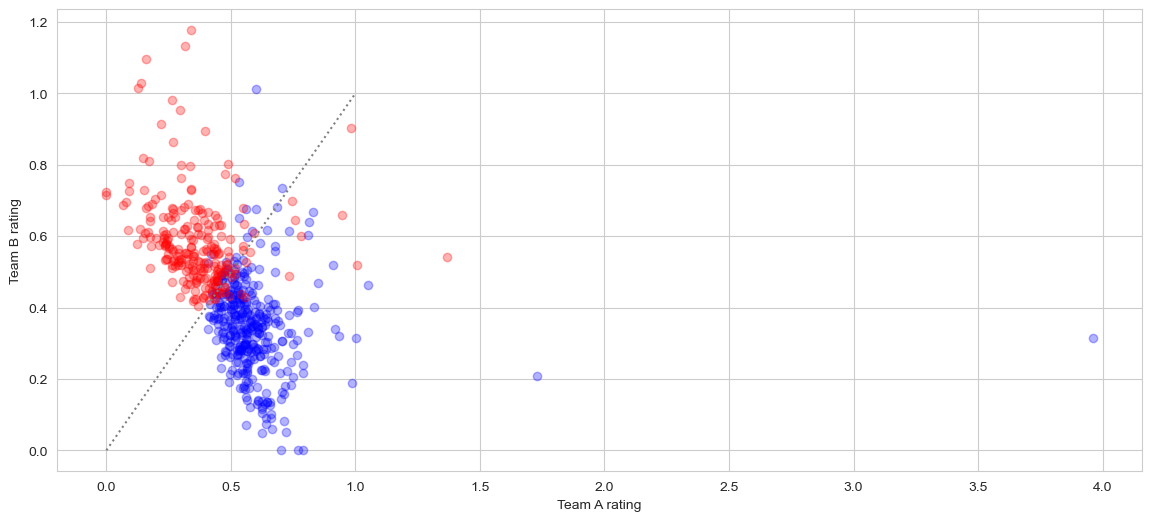

In [741]:
plt.figure(figsize=(14,6))
#plt.subplot(1, 2, 1)  # row 1, column 2, count 1

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating,
    c="blue",
    alpha=alpha,
    label = "A win"
)

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating,
    c="red",
    alpha=alpha,
    label= "B win"
)
plt.plot(range(0,2), range(0,2), linestyle="dotted", color="grey", label="A rating = B rating")
plt.xlabel("Team A rating")
plt.ylabel("Team B rating")

# using subplot function and creating plot two
# row 1, column 2, count 2
# plt.subplot(1, 2, 2)
 
# plt.scatter(
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating.to_numpy().reshape(-1,1)),
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating.to_numpy().reshape(-1,1)),
#     c="blue",
#     alpha=alpha,
#     label="A win"
# )

# plt.scatter(
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating.to_numpy().reshape(-1,1)),
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating.to_numpy().reshape(-1,1)),
#     c="red",
#     alpha=alpha,
#     label ="B win"
# )

# plt.plot(range(-4,5), range(-4,5), linestyle="dotted", color="grey", label="A rating = B rating")
# plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

# plt.xlabel("Team A rating scaled")
# plt.ylabel("Team B rating scaled")
 
plt.show()

In [742]:
print("mean of team A win:", np.mean(final_rating_df.Team_A_win))
print("mean of team B win:", np.mean(final_rating_df.Team_B_win))

mean of team A win: 0.6023489932885906
mean of team B win: 0.3976510067114094


In [743]:
lr = LogisticRegression()
X = final_rating_df[["Team_A_rating", "Team_B_rating"]]
y = final_rating_df.Team_A_win.to_numpy().reshape(-1,1)

In [744]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [745]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)
print("mean of true value:", np.mean(y_test))
print("mean of prediction:", np.mean(pred))
print("Accuracy:", acc)

mean of true value: 0.6040268456375839
mean of prediction: 0.6778523489932886
Accuracy: 0.8993288590604027


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


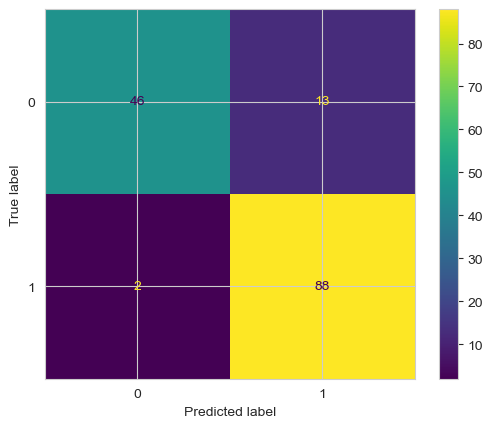

In [746]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Before chams 2022

In [747]:
chams_2022_team_rating = final_rating_df.loc[final_rating_df["Tournament"]=="Valorant Champions 2022"]

In [748]:
chams_2022_team_rating

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,LOUD,ZETA DIVISION,9,False,13,True,0.342734,0.515243
1,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,BOOM Esports,OpTic Gaming,13,True,3,False,0.646165,0.135679
2,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,LOUD,OpTic Gaming,13,True,10,False,0.570627,0.332273
3,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XERXIA Esports,XSET,13,True,11,False,0.440186,0.438816
4,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,100 Thieves,DRX,13,True,9,False,0.835589,0.400342
5,Valorant Champions 2022,Group Stage,Elimination (B),BOOM Esports vs ZETA DIVISION,Fracture,ZETA DIVISION,BOOM Esports,2,False,13,True,0.088758,0.617300
6,Valorant Champions 2022,Group Stage,Winner's (C),FunPlus Phoenix vs XSET,Fracture,XSET,FunPlus Phoenix,13,True,4,False,0.569178,0.242689
7,Valorant Champions 2022,Playoffs,Upper Quarterfinals,XSET vs FNATIC,Fracture,FNATIC,XSET,13,True,11,False,0.510875,0.468498
8,Valorant Champions 2022,Playoffs,Lower Round 2,DRX vs FNATIC,Fracture,FNATIC,DRX,13,True,9,False,0.434135,0.442067
9,Valorant Champions 2022,Playoffs,Lower Final,OpTic Gaming vs DRX,Fracture,DRX,OpTic Gaming,8,False,13,True,0.496675,0.496811


In [749]:
lr2 = LogisticRegression()
W_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"][["Team_A_rating", "Team_B_rating"]]
z_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"].Team_A_win.to_numpy().reshape(-1,1)

W_test = chams_2022_team_rating[["Team_A_rating", "Team_B_rating"]]
z_test = chams_2022_team_rating.Team_A_win.to_numpy().reshape(-1,1)

In [750]:
print(len(W_train), len(W_test))

586 10


In [751]:
lr2.fit(W_train, z_train)
pred2 = lr2.predict(W_test)
acc2 = accuracy_score(z_test, pred2)
print("mean of true values:", np.mean(z_test))
print("mean of prediction:", np.mean(pred2))
print("Accuracy:", acc2)

mean of true values: 0.7
mean of prediction: 0.8
Accuracy: 0.9


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


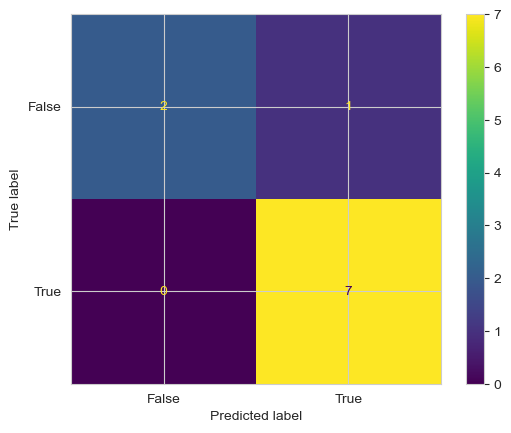

In [752]:
cm2 = confusion_matrix(z_test, pred2, labels=lr2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=lr2.classes_)
disp2.plot()
plt.show()

Overall Team Rating

In [753]:
grouped_overall_rating_df_A = Eco_rounds_ab_2022.groupby(['Team A'])["Rating_A"].agg("mean").reset_index()
grouped_overall_rating_df_B = Eco_rounds_ab_2022.groupby(['Team B'])["Rating_B"].agg("mean").reset_index()
#print(grouped_rating_df_A.head())
print(grouped_overall_rating_df_A.head(20))

               Team A  Rating_A
0         100 Thieves  0.533527
1           19esports  0.466073
2         3 Gün Yeter  0.649079
3          3P eSports  0.453202
4           47 Gaming  0.781647
5              5MOKES  0.279142
6                ADHD  0.562679
7                  AF  0.524303
8            ARF TEAM  0.359984
9        Able Esports  0.434479
10  Absolute amateurs  0.477582
11      Acris Esports  0.787982
12          Action PH  0.391432
13   Aestrial Esports  0.427895
14              Akrew  0.574721
15  Alpha Esports Pro  0.413076
16          Alter Ego  0.501417
17             Andbox  0.438390
18       Angry Titans  0.471496
19             Aspyre  0.396022


In [754]:
chams_2022 =  maps_scores.loc[ (maps_scores["Tournament"]=="Valorant Champions 2022")]
len(chams_2022)

10

In [755]:
champs_rating_overall_df = chams_2022.merge(grouped_overall_rating_df_A, on=["Team A"], how="left")
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Rating_A
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,9,False,LOUD,13,True,0.449277
1,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,OpTic Gaming,13,True,BOOM Esports,3,False,0.559046
2,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,OpTic Gaming,13,True,LOUD,10,False,0.559046
3,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XSET,13,True,XERXIA Esports,11,False,0.493861
4,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,DRX,13,True,100 Thieves,9,False,0.580544
5,Valorant Champions 2022,Group Stage,Elimination (B),BOOM Esports vs ZETA DIVISION,Fracture,BOOM Esports,2,False,ZETA DIVISION,13,True,0.518444
6,Valorant Champions 2022,Group Stage,Winner's (C),FunPlus Phoenix vs XSET,Fracture,FunPlus Phoenix,13,True,XSET,4,False,0.536777
7,Valorant Champions 2022,Playoffs,Upper Quarterfinals,XSET vs FNATIC,Fracture,XSET,13,True,FNATIC,11,False,0.493861
8,Valorant Champions 2022,Playoffs,Lower Round 2,DRX vs FNATIC,Fracture,DRX,13,True,FNATIC,9,False,0.580544
9,Valorant Champions 2022,Playoffs,Lower Final,OpTic Gaming vs DRX,Fracture,OpTic Gaming,8,False,DRX,13,True,0.559046


In [756]:
champs_rating_overall_df = champs_rating_overall_df.merge(grouped_overall_rating_df_B, on=["Team B"], how="left")
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Rating_A,Rating_B
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,9,False,LOUD,13,True,0.449277,0.541830
1,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,OpTic Gaming,13,True,BOOM Esports,3,False,0.559046,0.505785
2,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,OpTic Gaming,13,True,LOUD,10,False,0.559046,0.541830
3,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XSET,13,True,XERXIA Esports,11,False,0.493861,0.403470
4,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,DRX,13,True,100 Thieves,9,False,0.580544,0.482855
5,Valorant Champions 2022,Group Stage,Elimination (B),BOOM Esports vs ZETA DIVISION,Fracture,BOOM Esports,2,False,ZETA DIVISION,13,True,0.518444,0.553541
6,Valorant Champions 2022,Group Stage,Winner's (C),FunPlus Phoenix vs XSET,Fracture,FunPlus Phoenix,13,True,XSET,4,False,0.536777,0.331934
7,Valorant Champions 2022,Playoffs,Upper Quarterfinals,XSET vs FNATIC,Fracture,XSET,13,True,FNATIC,11,False,0.493861,0.408787
8,Valorant Champions 2022,Playoffs,Lower Round 2,DRX vs FNATIC,Fracture,DRX,13,True,FNATIC,9,False,0.580544,0.408787
9,Valorant Champions 2022,Playoffs,Lower Final,OpTic Gaming vs DRX,Fracture,OpTic Gaming,8,False,DRX,13,True,0.559046,0.581839


In [757]:
champs_rating_overall_df=champs_rating_overall_df.rename(columns={"Rating_A":"Team_A_rating", "Rating_B":"Team_B_rating"})
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Valorant Champions 2022,Group Stage,Opening (B),ZETA DIVISION vs LOUD,Fracture,ZETA DIVISION,9,False,LOUD,13,True,0.449277,0.541830
1,Valorant Champions 2022,Group Stage,Opening (B),OpTic Gaming vs BOOM Esports,Fracture,OpTic Gaming,13,True,BOOM Esports,3,False,0.559046,0.505785
2,Valorant Champions 2022,Group Stage,Winner's (B),OpTic Gaming vs LOUD,Fracture,OpTic Gaming,13,True,LOUD,10,False,0.559046,0.541830
3,Valorant Champions 2022,Group Stage,Opening (C),XSET vs XERXIA Esports,Fracture,XSET,13,True,XERXIA Esports,11,False,0.493861,0.403470
4,Valorant Champions 2022,Group Stage,Winner's (D),DRX vs 100 Thieves,Fracture,DRX,13,True,100 Thieves,9,False,0.580544,0.482855
5,Valorant Champions 2022,Group Stage,Elimination (B),BOOM Esports vs ZETA DIVISION,Fracture,BOOM Esports,2,False,ZETA DIVISION,13,True,0.518444,0.553541
6,Valorant Champions 2022,Group Stage,Winner's (C),FunPlus Phoenix vs XSET,Fracture,FunPlus Phoenix,13,True,XSET,4,False,0.536777,0.331934
7,Valorant Champions 2022,Playoffs,Upper Quarterfinals,XSET vs FNATIC,Fracture,XSET,13,True,FNATIC,11,False,0.493861,0.408787
8,Valorant Champions 2022,Playoffs,Lower Round 2,DRX vs FNATIC,Fracture,DRX,13,True,FNATIC,9,False,0.580544,0.408787
9,Valorant Champions 2022,Playoffs,Lower Final,OpTic Gaming vs DRX,Fracture,OpTic Gaming,8,False,DRX,13,True,0.559046,0.581839


In [758]:
lr3 = LogisticRegression()
A_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"][["Team_A_rating", "Team_B_rating"]]
b_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"].Team_A_win.to_numpy().reshape(-1,1)

A_test = champs_rating_overall_df[["Team_A_rating", "Team_B_rating"]]
b_test = champs_rating_overall_df.Team_A_win.to_numpy().reshape(-1,1)

In [759]:
print(len(A_train), len(b_test))

586 10


In [760]:
lr3.fit(A_train, b_train)
pred3 = lr3.predict(A_test)
acc3 = accuracy_score(b_test, pred3)
print("mean of true values:", np.mean(b_test))
print("mean of prediction:", np.mean(pred3))
print("Accuracy:", acc3)

mean of true values: 0.7
mean of prediction: 0.8
Accuracy: 0.9


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


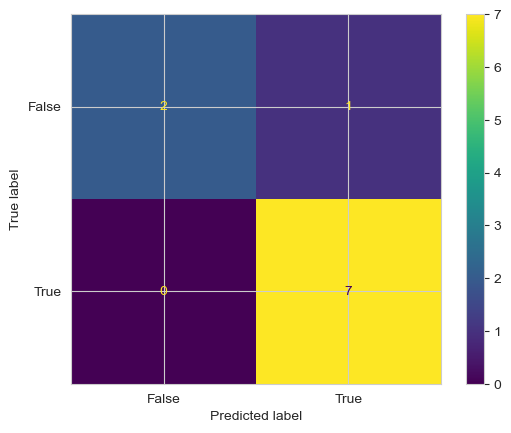

In [761]:
cm3 = confusion_matrix(b_test, pred3, labels=lr3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=lr3.classes_)
disp3.plot()
plt.show()